# Worksheet 21

Name: Youxuan Ma

UID: U23330522

### Topics

- Logistic Regression
- Gradient Descent

## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

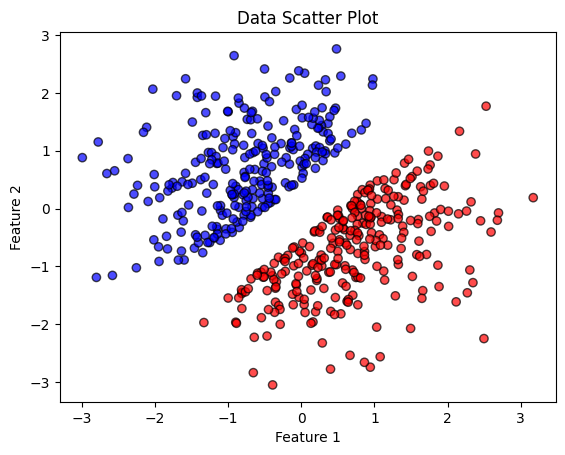

In [2]:
def plot_data(X, Y):
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', alpha=0.7, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Data Scatter Plot')
    plt.show()


X, Y = generate_line_data()
plot_data(X, Y)


b) Fit a logistic regression model to the data and print out the coefficients.

In [3]:
model = LogisticRegression().fit(X, Y)

coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [[ 4.11128306 -4.10408124]]
Intercept: [0.06146435]


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

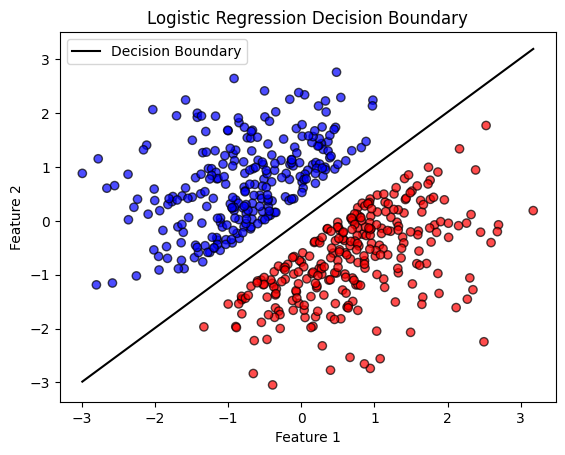

In [4]:
def plot_decision_boundary(X, Y, model):
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', alpha=0.7, edgecolors='k')
    x_values = [np.min(X[:, 0]), np.max(X[:, 0])]
    y_values = -(model.intercept_ + np.dot(model.coef_[0][0], x_values)) / model.coef_[0][1]
    plt.plot(x_values, y_values, label="Decision Boundary", color="black")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.show()

plot_decision_boundary(X, Y, model)


d) Using the above code, generate and plot the CIRCLE data.

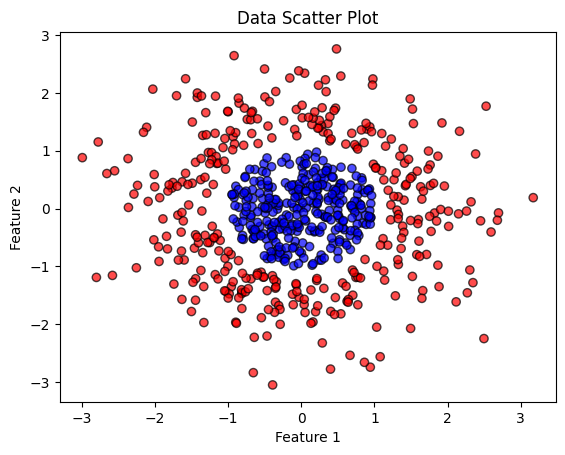

In [5]:
X_c, Y_c = generate_circle_data(t)
plot_data(X_c, Y_c)

e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [6]:
X_transformed = np.array([[x[0]**2, x[1]**2] for x in X_c])
model = LogisticRegression().fit(X_transformed, Y_c)

coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [[4.91410958 4.97630742]]
Intercept: [-6.45841785]


f) Plot the decision boundary using the code below.

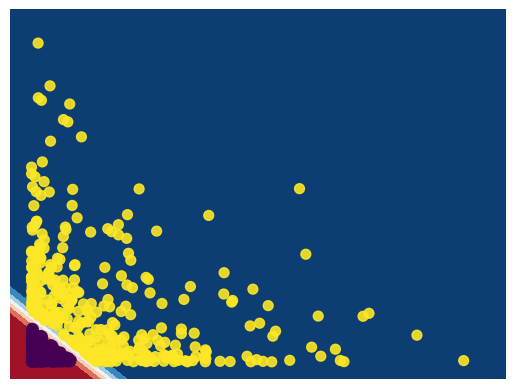

In [7]:
X = X_transformed
Y = Y_c

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

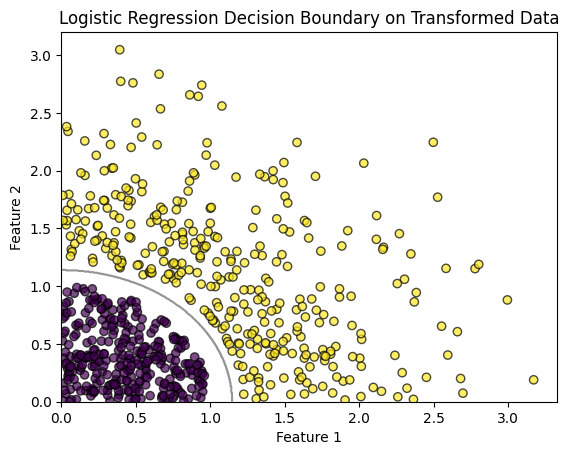

In [8]:
def plot_decision_boundary_original_space(X, Y, model):
    plt.scatter([np.sqrt(x[0]) for x in X], [np.sqrt(x[1]) for x in X], c=Y, cmap='viridis', edgecolors='k', alpha=0.7)
    x = np.linspace(0, 1.5, 300)
    y = np.linspace(0, 1.5, 300)
    xx, yy = np.meshgrid(x, y)
    zz = model.predict(np.c_[xx.ravel()**2, yy.ravel()**2]).reshape(xx.shape)
    plt.contour(xx, yy, zz, levels=[0.5], cmap="Greys", vmin=0, vmax=1)
    plt.title('Logistic Regression Decision Boundary on Transformed Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary_original_space(X_transformed, Y_c, model)

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

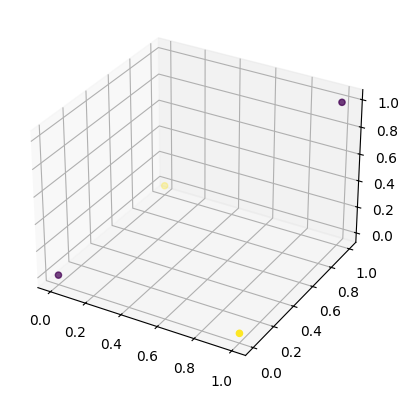

In [9]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = generate_xor_data()
ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
plt.show()

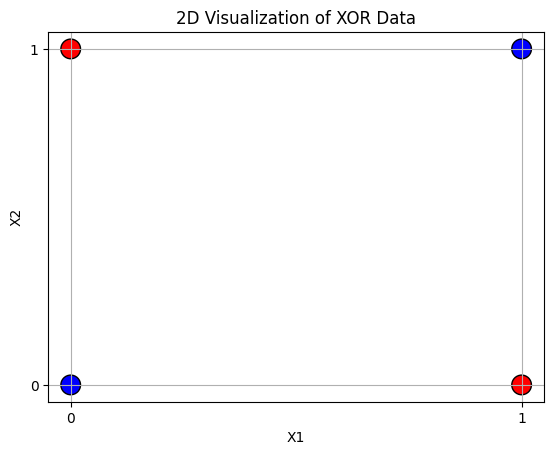

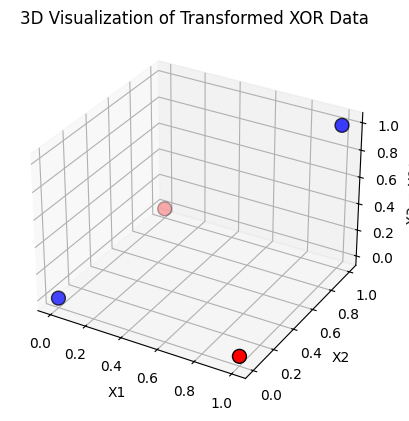

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot XOR data in 2D
def plot_xor_data(X, Y):
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', edgecolors='k', s=200, marker='o')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('2D Visualization of XOR Data')
    plt.grid(True)
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.show()

# Transform XOR data for 3D visualization
def transform_xor_data(X):
    X3 = X[:, 0] * X[:, 1]
    X_transformed = np.hstack((X, X3[:, np.newaxis]))
    return X_transformed

# Plot transformed XOR data in 3D
def plot_3d_xor_data(X, Y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap='bwr', s=100, edgecolors='k')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3 = X1*X2')
    ax.set_title('3D Visualization of Transformed XOR Data')
    plt.show()

X, Y = generate_xor_data()
plot_xor_data(X, Y)
X_transformed = transform_xor_data(X)
plot_3d_xor_data(X_transformed, Y)


h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

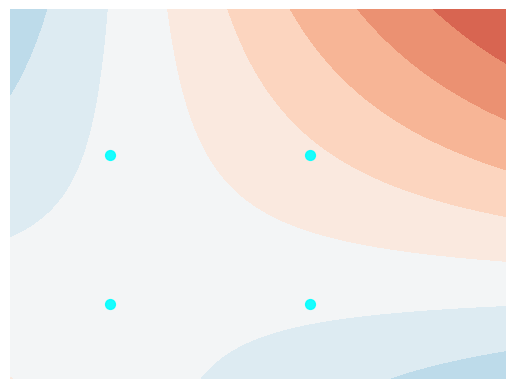

In [11]:
X, Y = generate_xor_data()

poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=Y, s=50, alpha=0.9)
plt.show()

In [12]:
X, Y = generate_xor_data()
X_transformed = transform_xor_data(X)
model = LogisticRegression().fit(X_transformed, Y)

coefficients = model.coef_[0]
intercept = model.intercept_[0]
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.04285144  0.04285144 -0.43037246]
Intercept: 0.06433821644455287


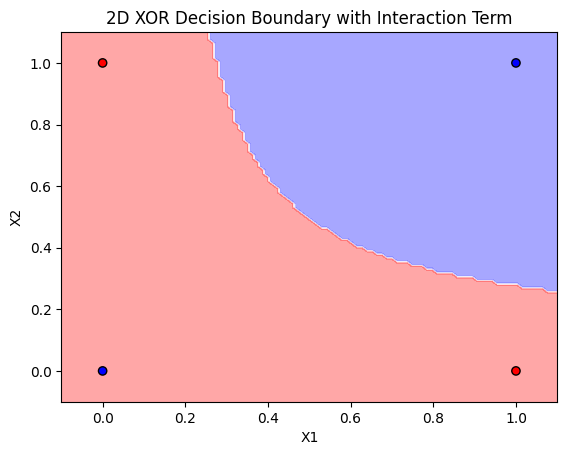

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_2d_decision_boundary(X, Y, model):
    # Set up meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Calculate z values through the model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), (xx * yy).ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', edgecolors='k')
    plt.title('2D XOR Decision Boundary with Interaction Term')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

plot_2d_decision_boundary(X, Y, model)


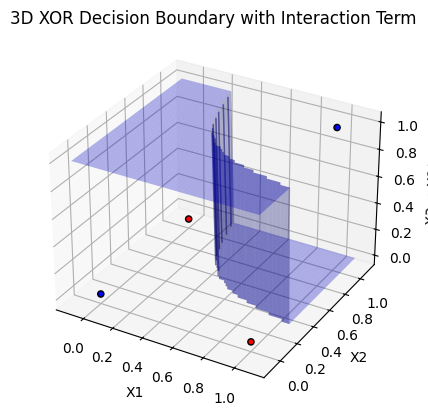

In [14]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_decision_boundary(X, Y, model):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Set up meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
    zz = model.predict(np.c_[xx.ravel(), yy.ravel(), (xx * yy).ravel()])

    # Plot the surface
    zz = zz.reshape(xx.shape)
    ax.plot_surface(xx, yy, zz, color='b', alpha=0.3)

    # Scatter plot of original data points
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap='bwr', edgecolors='k', depthshade=False)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3 = X1*X2')
    ax.set_title('3D XOR Decision Boundary with Interaction Term')

    plt.show()

plot_3d_decision_boundary(X_transformed, Y, model)


0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75


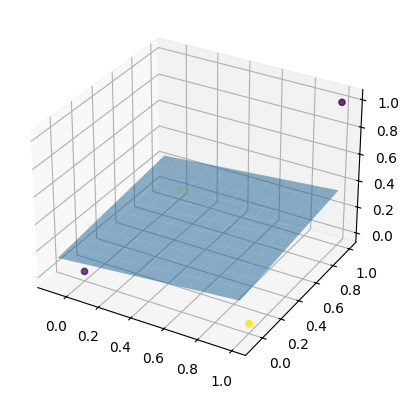

In [15]:
from mpl_toolkits.mplot3d import Axes3D
X, Y = generate_xor_data()

for i in range(2000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09861D+00    |proj g|=  1.56782D+00

At iterate    1    f=  8.95383D-01    |proj g|=  5.58383D-01

At iterate    2    f=  8.27195D-01    |proj g|=  3.32189D-01

At iterate    3    f=  7.96120D-01    |proj g|=  6.06694D-01

At iterate    4    f=  7.66577D-01    |proj g|=  1.62504D-01

At iterate    5    f=  7.38227D-01    |proj g|=  1.74906D-01

At iterate    6    f=  6.22098D-01    |proj g|=  1.59122D-01

At iterate    7    f=  4.78311D-01    |proj g|=  1.20393D-01

At iterate    8    f=  2.88632D-01    |proj g|=  2.29261D-01

At iterate    9    f=  2.73371D-01    |proj g|=  3.32278D-01

At iterate   10    f=  1.61027D-01    |proj g|=  1.86164D-01

At iterate   11    f=  1.31057D-01    |proj g|=  8.20086D-02

At iterate   12    f=  1.09857D-01    |proj g|=  4.31233D-02

At iterate   13    f=  9.5

 This problem is unconstrained.


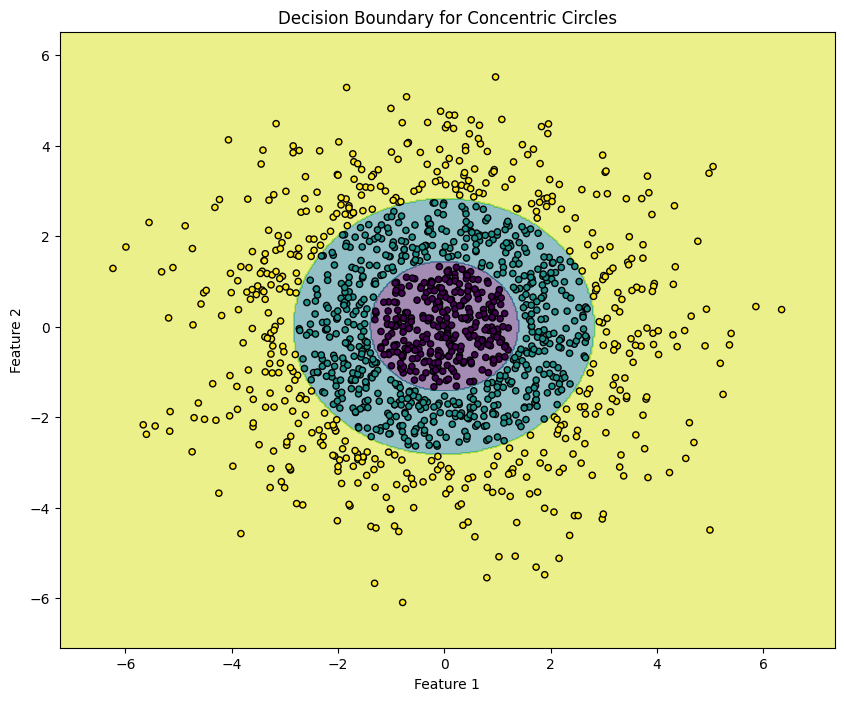

In [16]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = generate_circles_data(t)

poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

def plot_decision_boundary(X, Y, model):
    # Set up the mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k', cmap='viridis')
    plt.title('Decision Boundary for Concentric Circles')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(X, Y, model)


## Gradient Descent

Recall in Linear Regression we are trying to find the line $$y = X \beta$$ that minimizes the sum of square distances between the predicted `y` and the `y` we observed in our dataset:

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2$$

We were able to find a global minimum to this loss function but we will try to apply gradient descent to find that same solution.

a) Implement the `loss` function to complete the code and plot the loss as a function of beta.

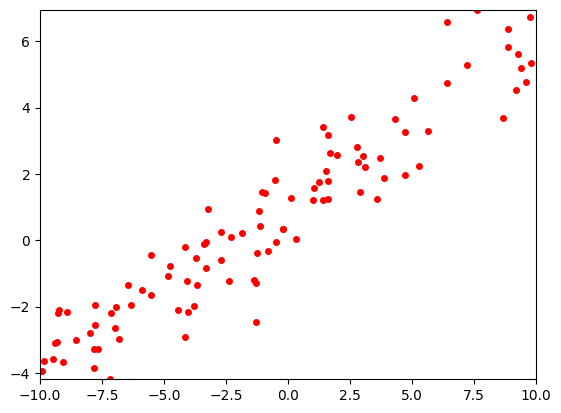

In [17]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

beta = np.array([ 1 , .5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0]+(beta[1]*xlin)+np.random.randn(100)


fig, ax = plt.subplots()
ax.plot(xlin, y,'ro',markersize=4)
ax.set_xlim(-10, 10)
ax.set_ylim(min(y), max(y))
plt.show()

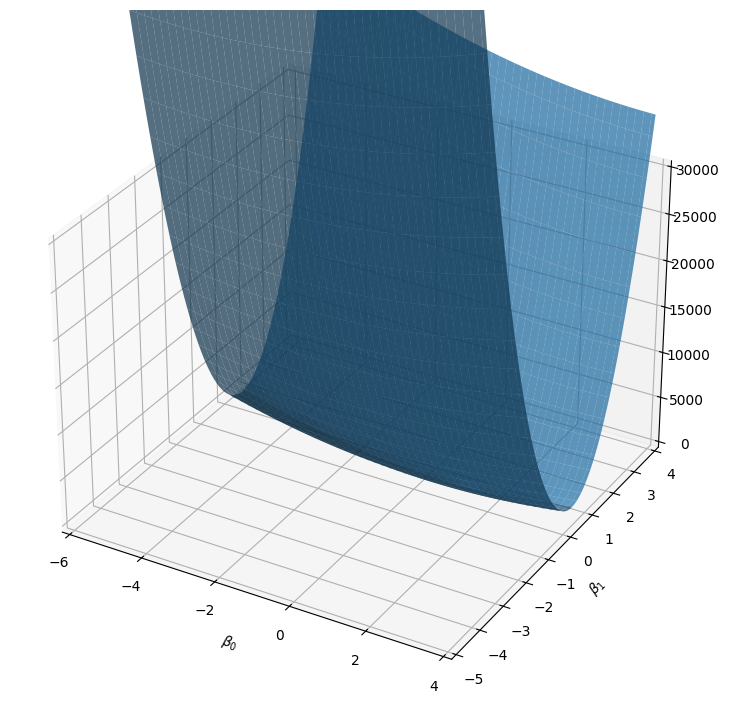

In [18]:
b0 = np.arange(-5, 4, 0.1)
b1 = np.arange(-5, 4, 0.1)
b0, b1 = np.meshgrid(b0, b1)

def loss(X, y, beta):
    residuals = y - X @ beta
    return np.dot(residuals, residuals)

def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-6, 4)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-5, 4)
ax.set_zlim(0, 30000)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

Since the loss is

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2 = \beta^T X^T X \beta - 2\mathbf{\beta}^TX^T\mathbf{y}  + \mathbf{y}^T\mathbf{y}$$

The gradient is

$$\nabla_\beta \mathcal{L}(\mathbf{\beta}) = 2X^T X \beta - 2X^T\mathbf{y}$$

b) Implement the gradient function below and complete the gradient descent algorithm

In [19]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 4)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-5, 4)
    ax.set_zlim(0, 30000)

    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.canvas.draw()
    
    img = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    plt.close(fig)

    img = img[..., :3]
    return im.fromarray(img)



def gradient(X, y, beta):
    return 2 * X.T @ X @ beta - 2 * X.T @ y


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        grad = gradient(X, y, beta_hat)
        beta_hat = beta_hat - learning_rate * grad

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2])
learning_rate = 0.0002 # try .0005
epochs = 50
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, epochs, images)

images[0].save(
    'gd.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

c) Use the code above to create an animation of the linear model learned at every epoch.

In [20]:
def snap_model(beta):
    xplot = np.linspace(-10,10,50)
    yestplot = beta[0] + beta[1] * xplot
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot,'b-',lw=2)
    ax.plot(xlin, y,'ro',markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y), max(y))
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap_model(beta_hat))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 100, images)

images[0].save(
    'model.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)

In logistic regression, the `loss` is the negative log-likelihood

$$ \mathcal{l}(\mathbf{\beta}) = - \frac{1}{N} \sum_{i=1}^{N} y_i \log(\sigma(x_i \beta)) + (1 - y_i)\log(1 - \sigma(x_i \beta))$$

the gradient of which is:

$$\nabla_\beta \mathcal{l}(\mathbf{\beta}) = \frac{1}{N} \sum_{i=1}^{N} x_i (y_i - \sigma(x_i \beta)) $$

d) Plot the loss as a function of b.

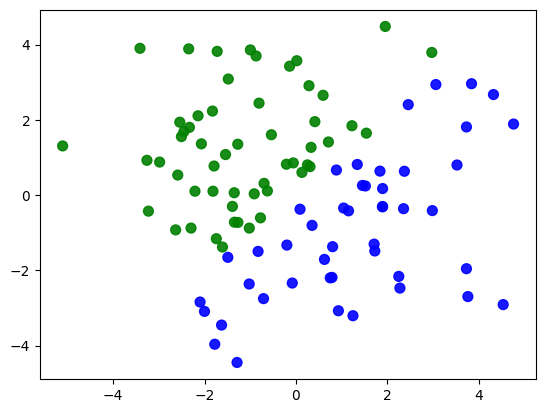

In [27]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = t
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, y = generate_line_data()

cs = np.array([x for x in 'gb'])
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=cs[y].tolist(), s=50, alpha=0.9)
plt.show()

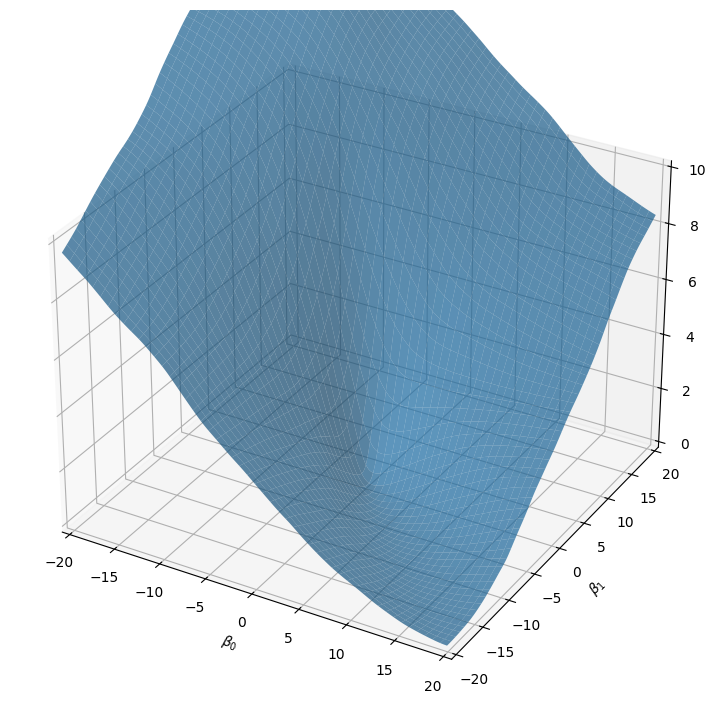

In [28]:
b0 = np.arange(-20, 20, 0.1)
b1 = np.arange(-20, 20, 0.1)
b0, b1 = np.meshgrid(b0, b1)


def sigmoid(x):
    e = np.exp(x)
    return e / (1 + e)


def loss(X, y, beta):
    predictions = sigmoid(X @ beta)
    epsilon = 1e-9  # Adding a small constant to prevent log(0)
    loss = -np.mean(y * np.log(predictions + epsilon) + (1 - y) * np.log(1 - predictions + epsilon))
    return loss

def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-20, 20)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-20, 20)
ax.set_zlim(0, 10)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

e) Plot the loss at each iteration of the gradient descent algorithm.

In [29]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    fig = plt.figure(figsize=(14, 9))
    ax = plt.axes(projection='3d')
    ax.view_init(10, 10)
    ax.set_xlim(-20, 20)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-20, 20)
    ax.set_zlim(0, 10)
    
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:, 0], np.array(betas)[:, 1], losses, 'o-', c='r', markersize=10, zorder=10)
    plt.close()

    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    img = img[..., :3]
    
    return im.fromarray(img)



def gradient(X, y, beta):
    predictions = sigmoid(X @ beta)
    errors = y - predictions
    grad = -X.T @ errors / len(y)
    return grad


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2])
learning_rate = 0.1
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 50, images)

images[0].save(
    'gd_logit.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

f) Create an animation of the logistic regression fit at every epoch.

In [30]:
def snap_fit(beta, X, y, epoch, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = sigmoid(np.c_[xx.ravel(), yy.ravel()] @ beta)
    Z = Z.reshape(xx.shape)

    cs = np.array([x for x in 'gb'])
    ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='RdBu', alpha=0.5)
    ax.scatter(X[:, 0], X[:, 1], color=cs[y].tolist(), s=50, alpha=0.9, edgecolors='k')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f'Epoch {epoch}')
    plt.close()

    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    img = img[..., :3]

    return im.fromarray(img)

def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]
    images.append(snap_fit(beta_hat, X, y, 0))

    for epoch in range(1, epochs + 1):
        grad = gradient(X, y, beta_hat)
        beta_hat = beta_hat - learning_rate * grad
        current_loss = loss(X, y, beta_hat)
        
        losses.append(current_loss)
        betas.append(beta_hat)
        images.append(snap_fit(beta_hat, X, y, epoch))
        
    return np.array(betas), np.array(losses)

beta_start = np.array([-3, -2])
learning_rate = 0.1  
epochs = 100
images = []

betas, losses = gradient_descent(X, y, beta_start, learning_rate, epochs, images)

images[0].save(
    'logit_model_fit.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)


g) Modify the above code to evaluate the gradient on a random batch of the data. Overlay the true loss curve and the approximation of the loss in your animation.

In [31]:
def get_batch(X, y, batch_size):
    idx = np.random.randint(0, len(y), batch_size)
    return X[idx], y[idx]

def gradient(X, y, beta):
    predictions = sigmoid(X @ beta)
    errors = y - predictions
    grad = -X.T @ errors / len(y)
    return grad

def gradient_descent(X, y, beta_hat, learning_rate, epochs, batch_size, images, loss_data):
    for epoch in range(epochs):
        X_batch, y_batch = get_batch(X, y, batch_size)
        grad = gradient(X_batch, y_batch, beta_hat)
        beta_hat = beta_hat - learning_rate * grad

        approx_loss = loss(X_batch, y_batch, beta_hat)
        true_loss = loss(X, y, beta_hat)
        
        loss_data.append((true_loss, approx_loss))
        images.append(snap_fit(beta_hat, X, y, epoch, loss_data))
        
    return beta_hat

def snap_fit(beta, X, y, epoch, loss_data, ax=None):
    if ax is None:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    else:
        ax1, ax2 = ax

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = sigmoid(np.c_[xx.ravel(), yy.ravel()] @ beta)
    Z = Z.reshape(xx.shape)
    cs = np.array([x for x in 'gb'])
    ax1.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='RdBu', alpha=0.5)
    ax1.scatter(X[:, 0], X[:, 1], color=cs[y].tolist(), s=50, alpha=0.9, edgecolors='k')

    ax1.set_xlim(xx.min(), xx.max())
    ax1.set_ylim(yy.min(), yy.max())
    ax1.set_title(f'Epoch {epoch}')

    true_losses, approx_losses = zip(*loss_data)
    ax2.plot(true_losses, label='True Loss')
    ax2.plot(approx_losses, label='Approximated Loss')
    ax2.legend()
    ax2.set_title('Loss over epochs')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')

    plt.close(fig)
    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    img = img[..., :3]

    return im.fromarray(img)

beta_start = np.array([-3, -2])
learning_rate = 0.1
epochs = 100
batch_size = 20
images = []
loss_data = []

final_beta = gradient_descent(X, y, beta_start, learning_rate, epochs, batch_size, images, loss_data)

images[0].save(
    'batch_logit_fit.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)


h) Below is a sandox where you can get intuition about how to tune gradient descent parameters:

In [26]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(x, y, pts, losses, grad):
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.plot_surface(x, y, loss(np.array([x, y])), color='r', alpha=.4)
    ax.plot(np.array(pts)[:,0], np.array(pts)[:,1], losses, 'o-', c='b', markersize=10, zorder=10)
    ax.plot(np.array(pts)[-1,0], np.array(pts)[-1,1], -1, 'o-', c='b', alpha=.5, markersize=7, zorder=10)
    
    # Plot Gradient Vector
    X, Y, Z = [pts[-1][0]], [pts[-1][1]], [-1]
    U, V, W = [-grad[0]], [-grad[1]], [0]
    ax.quiver(X, Y, Z, U, V, W, color='g')
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def loss(x):
    return np.sin(sum(x**2)) # change this

def gradient(x):
    return 2 * x * np.cos(sum(x**2)) # change this

def gradient_descent(x, y, init, learning_rate, epochs):
    images, losses, pts = [], [loss(init)], [init]
    for _ in range(epochs):
        grad = gradient(init)
        images.append(snap(x, y, pts, losses, grad))
        init = init - learning_rate * grad
        losses.append(loss(init))
        pts.append(init)
    return images

init = np.array([-.5, -.5]) # change this
learning_rate = 1.394 # change this
x, y = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1)) # change this
images = gradient_descent(x, y, init, learning_rate, 12)

images[0].save(
    'gradient_descent.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)